In [1]:
import pandas as pd

data = pd.read_csv('../data/youth_indicators_tois.csv')
data

,TOI,bv,bv_err,li,prot,rhk,teff
0,101.01,0.656000,0.1,NaN,1.430321,NaN,5648.642857
1,102.01,0.507667,0.1,NaN,4.410011,NaN,6257.270417
2,103.01,0.291000,0.1,NaN,3.554638,NaN,6086.159167
3,104.01,0.545667,0.1,NaN,4.090360,NaN,6046.516250
4,105.01,0.687667,0.1,NaN,2.187803,NaN,5741.285333
...,...,...,...,...,...,...,...
4312,5023.01,NaN,NaN,NaN,NaN,NaN,3720.494840
4313,5024.01,0.612000,NaN,NaN,NaN,NaN,5985.393333
4314,5025.01,0.313000,NaN,NaN,NaN,NaN,8132.166667
4315,5026.01,0.700000,NaN,NaN,NaN,NaN,6444.962144


In [2]:
data.dropna(how='any')

,TOI,bv,bv_err,li,prot,rhk,teff
98,200.01,0.735647,0.048146,108.107498,5.475,-4.09,5482.444615


In [5]:
d=data.query("TOI==200.01").squeeze()
d

TOI        200.010000
bv           0.735647
bv_err       0.048146
li         108.107498
prot         5.475000
rhk         -4.090000
teff      5482.444615
Name: 98, dtype: float64

In [22]:
bv,rhk,li = d.bv, d.rhk, d.li
bv_err,li_err = 0.1, 50

# BAFFLES

In [23]:
import os

os.chdir('/ut3/jerome/github/research/project/ext_tools/BAFFLES/')

In [24]:
from baffles import *

In [ ]:
res = baffles_age(bv,rhk,li,bv_err,li_err,
            upperLim=False,
            maxAge=None,
            fileName='baffles',
            showPlots=False,
            savePlots=False, 
            savePostAsText=False
           )

In [19]:
bv, bv_err = 0.670571, 0.01 
rhk = -4.35
li, li_err = 0.166, 0.1

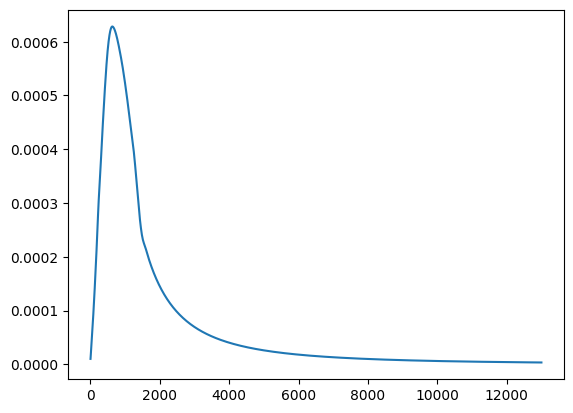

In [20]:
import matplotlib.pyplot as plt

baffles_ca = age_estimator('calcium')
post_ca = baffles_ca.get_posterior(bv=bv,metallicity=-4.5)

ca_const = utils.init_constants('calcium')
plt.plot(ca_const.AGE, post_ca.array)

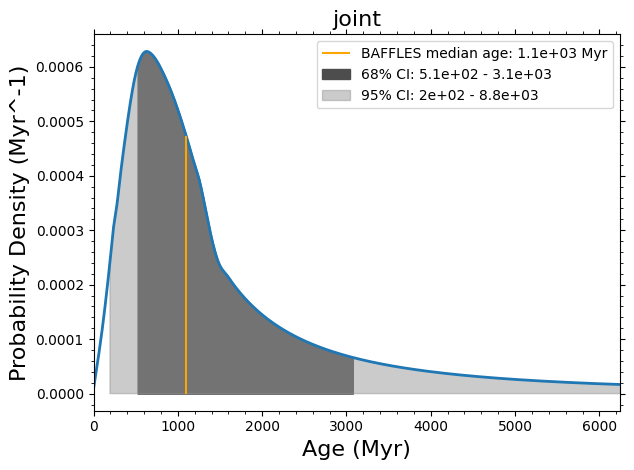

In [21]:
import probability as prob

y = post_ca.array #* post_li.array
prob.normalize(ca_const.AGE, y)
stats = prob.stats(ca_const.AGE, y)
my_plot.posterior(ca_const.AGE, y, prob.stats(ca_const.AGE, y), 'joint', showPlot=False)

[========================>] 100% ETA: 0:00:00
Finished 23 stars. Average time per star: 0.16 seconds.
Isochronal age exists within 61.298148 % CI


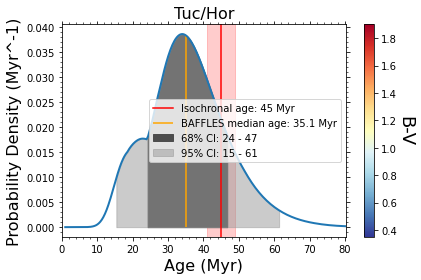

In [29]:
import readData
# Exmple 4: Lets compute a posterior product and save it as a pdf
tuchor_bmv, tuchor_li,tuchor_li_err = readData.tuchor()
baffles_li = age_estimator('lithium')
# pp = PdfPages("tuchor_example_product.pdf")
product = baffles_li.posterior_product(tuchor_bmv,
                                       tuchor_li,
                                       bv_errs=None,
                                       measure_err_arr=tuchor_li_err,
                                       showPlot=True,
                                       #showStars=True, 
                                       title='Tuc/Hor', 
                                       givenAge=45,
                                       givenErr=4)